In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = {
    'Model': ['BERT', 'RoBERTa', 'XLNet', 'ALBERT', 'DistilBERT'],
    'Accuracy': [0.91, 0.93, 0.89, 0.87, 0.90],
    'F1-Score': [0.90, 0.92, 0.88, 0.86, 0.89],
    'Inference Time (ms)': [120, 140, 110, 100, 90],
    'Parameter Count (M)': [110, 125, 120, 95, 66]
}

In [4]:
df = pd.DataFrame(data)
criteria = {'Accuracy': '+', 'F1-Score': '+', 'Inference Time (ms)': '-', 'Parameter Count (M)': '-'}

In [5]:
# Normalize the data
normalized_df = df.copy()
for col in criteria:
    if criteria[col] == '+':
        normalized_df[col] = df[col] / np.sqrt((df[col]**2).sum())
    else:
        normalized_df[col] = 1 - (df[col] / np.sqrt((df[col]**2).sum()))


In [6]:
ideal_best = normalized_df.iloc[:, 1:].max().values
ideal_worst = normalized_df.iloc[:, 1:].min().values

distance_best = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_worst) ** 2).sum(axis=1))

In [7]:
topsis_score = distance_worst / (distance_best + distance_worst)

df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

In [8]:
df.to_csv("topsis_results.csv", index=False)

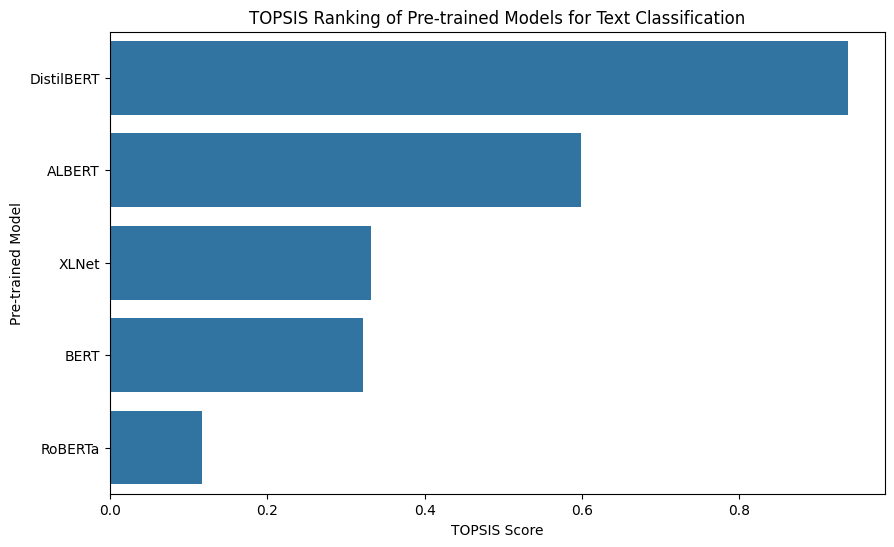

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['TOPSIS Score'], y=df['Model'], order=df.sort_values('TOPSIS Score', ascending=False)['Model'])
plt.xlabel("TOPSIS Score")
plt.ylabel("Pre-trained Model")
plt.title("TOPSIS Ranking of Pre-trained Models for Text Classification")
plt.show()

In [10]:
plt.savefig("topsis_ranking.png")

print("TOPSIS ranking completed and results saved.")

TOPSIS ranking completed and results saved.


<Figure size 640x480 with 0 Axes>